In [7]:
import pandas as pd
import numpy as np
import random as rd
import sklearn as skl
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# generate sample data
samples = ['sample'+str(i) for i in range(1,101)]

product_features=['p1f'+str(i) for i in range(1,6)]
process_features=['p2f'+str(i) for i in range(1,6)]

# now create a dataframe with specified column names. Note: we add * in front of the array name so that it will include the content of the array. Without the * sigh, it will put the array itself in, which looks like [[]]
data=pd.DataFrame(columns=[*product_features,*process_features], index=samples)

# now add in data to the dataframe. Data is generated using poisson distribution, with mean value ranging from 10 - 1000.
for v in data.index:
    data.loc[v,'p1f1':'p1f5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[v,'p2f1':'p2f5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)

print(data.head())
print(data.shape)

        p1f1 p1f2 p1f3 p1f4 p1f5 p2f1 p2f2 p2f3 p2f4 p2f5
sample1  518  474  535  540  544  162  178  175  171  163
sample2   28   24   28   21   27  281  235  249  248  269
sample3  630  608  626  601  630   18   13   16   17   16
sample4  694  686  693  707  669  994  885  976  958  986
sample5  899  973  930  913  938   93   94  114   93  115
(100, 10)


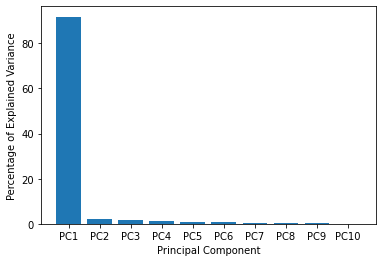

[91.8  2.2  1.7  1.4  1.   0.8  0.5  0.5  0.3  0. ]


In [3]:
# we have to center and scale the data before doing PCA
# preprocessing.scale normalize the data so that the mean of each variable are 0 and the standard deviation is 1
# note that Sum of Square of distance for PC1 for all the sample
# alternative method to use --> StandardScaler().fit_transform(data.T)
scaled_data=skl.preprocessing.scale(data.T)

# PCA stage. First we need to creat a PCA object
# In sklearn, we create object that can be trained using the training data, and then apply the ame object to the testing data. 
# In this case, we are only interested in exploring one dataset, and not using PCA for machine learning. 
pca=PCA()
# apply the PCA object on the scaled data. This is where the loading scores and the vairatiance that each PC accounts for are calculated. 
pca.fit(scaled_data)
# we then generate the coordinates for a PCA graph based on the loading scores and the scaled data
pca_data=pca.transform(scaled_data)
# calcuation the percent variation that each principal component accounts for
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
# print(per_var) --> a list that contains pct variance explained by each PC.
# now we create lable for the scree plot --> bar char lists the variace explained by each principal component
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
# now we matplotlib to create a bar chart
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title=('Scree Plot')
plt.show()





            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
p1f1  -9.114618 -1.060033 -0.842450 -0.177071 -1.378292 -1.415741  0.650759   
p1f2  -9.494897  0.218296 -2.021947 -1.618400  0.549294 -0.206739 -1.125725   
p1f3  -9.806602 -1.620595 -0.428738  0.560464  0.485107  2.010457  0.353587   
p1f4  -9.831668  1.488329  0.209152  2.108611  0.964653 -0.519149  0.389266   
p1f5  -9.629962  0.935166  3.050850 -0.859903 -0.659652  0.060539 -0.309857   
p2f1   9.433305 -2.035466  0.502221  0.132312 -1.225846  0.416443 -0.288478   
p2f2   9.586080 -0.333072  1.034666 -1.120218  1.694586 -0.350372 -0.143959   
p2f3   9.397539 -0.672031 -0.252110 -0.480405  0.701067 -0.489660  1.250560   
p2f4  10.068367 -0.084282 -0.260613  1.936240 -0.155371 -0.417772 -1.194528   
p2f5   9.392456  3.163688 -0.991030 -0.481631 -0.975546  0.911994  0.418373   

           PC8       PC9          PC10  
p1f1 -0.411177 -0.643471  1.776357e-15  
p1f2  0.335525  0.429319  2.386980e-15  
p1f3 -0

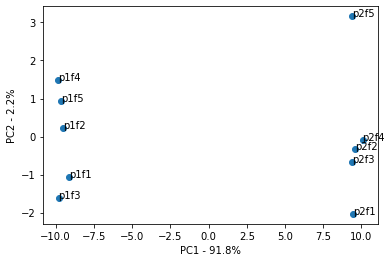

variable45    0.104368
variable40    0.104330
variable58    0.104317
variable37   -0.104314
variable17   -0.104314
variable57   -0.104299
variable23   -0.104293
variable54   -0.104284
variable91    0.104283
variable83   -0.104272
dtype: float64


In [4]:
# next we draw the PCA plot
# this table contains the projection of each feature on each PCs. 
pca_df=pd.DataFrame(pca_data,index=[*product_features, *process_features], columns=labels)
print(pca_df)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title=('My PCA Chart')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# now to the scatter plot, we add the sample names. 
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()
# we can tell that the features are ploted on the PCA plot, and seperatured into two clusters, and these two clusters can be well differentiated by PC1. 

# now let's look at the loading score for PC1 and to determine which variables had the largest influence on speparating the two clusters. 
loading_scores= pd.Series(pca.components_[0],index=variables)
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)
top_10_variables=sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_variables])


In [4]:
pip install pylint

Note: you may need to restart the kernel to use updated packages.
